# **DATA SIENCE PROJECT**

*Food.com Review Data*

### **Recommendation system**


 ***What is recommendation system ?***
    
- Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them.


- The recommender system deals with a large volume of information present by filtering the most important information based on the data provided by a user and other factors that take care of the user’s preference and interest. It finds out the match between user and item and imputes the similarities between users and items for recommendation. 


- Both the users and the services provided have benefited from these kinds of systems. The quality and decision-making process has also improved through these kinds of systems.

***Types of recommendation system***

There are mainly 6 types of the recommendations systems:

1.	Popularity based systems : It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.


2.	Classification model based: It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.


3.	Content based recommedations: It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.


4.	Collaberative Filtering: It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item.


5.	Hybrid Approaches: This system approach is to combine collaborative filtering, content-based filtering, and other approaches.


6.	Association rule mining : Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.


## **Dataset**

***Description***

- These datasets contain reviews from Food.com (formerly GeniusKitchen). Data includes cooking review texts.

***Atribute Information***
- user_id: Every user identified with a unique id
- recipe_id: Every recipe identified with a unique id
- rating: Rating of the corresponding recipe by the corresponding user
- date: Time of the rating (ignore this column for this project)


## **Building model**

In [1]:
#Import libraries

import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns
%matplotlib inline
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

Let have some explanation about what libraries I going to use in this project:

- Numpy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, Fourier transform, and matrices.


- Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
- Matplotlib is a low-level graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule


- Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.


- %Matplotlib inline allow Jupyter Notebook to display the output of plotting commands directly below the code cell.


- The last two libraries will be discussed latter.


***Data preparation***

In [2]:
df=pd.read_csv('interactions_train.csv')
df.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


Firstly, I read the Dataset and assign it as df and display the first 5 row of the Dataset. This Dataset contain 6 attributes.

In [3]:
df=df.drop(['date','u','i'],axis=1)
df.head()

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0


In the shake of this project, I only need to use 3 attributes there are user_id, recipe_id, rating. The rest are no longer in need so I will delete those columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   rating     698901 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 16.0 MB


I use the .info() to get the information about the dataset. As we can see, there are 698901 entries that mean the dataset has 698901 rows. I deleted all the unnecessary columns, so we only have 3 columns left, and luckily the Dataframe don’t have any null value, that’s mean there aren’t any missing value the data is clean, I can continue doing the project without any barrier.  But in the Dtype column which show the data type of the attributes. We can see that the user_id and recipe_id data type is int64. This data type refers the user_id and recipe_id is integer, that seem meaningless. These 2 attributes should be understood as string not a number. 

In [5]:
df[['user_id','recipe_id']] = df[['user_id','recipe_id']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  object 
 1   recipe_id  698901 non-null  object 
 2   rating     698901 non-null  float64
dtypes: float64(1), object(2)
memory usage: 16.0+ MB


I change the data type of the user_id, recipe_id into object type that is string type in Python.

***EDA***

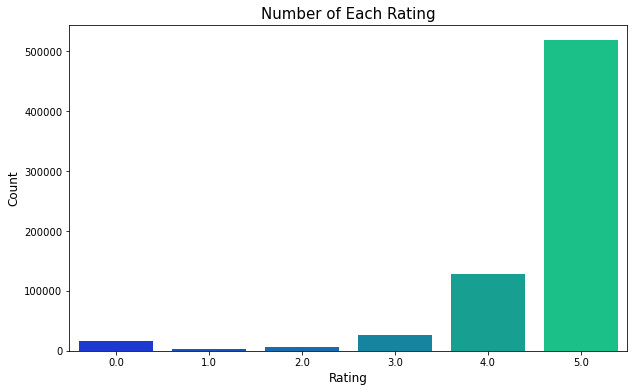

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df, palette='winter')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Each Rating', fontsize=15)
plt.show()

I make the bar plot name as number of each rating to understand about rating distribution. The rating range in the horizontal axis and the count of each rating on the vertical axis. As you can see the range of rating are from 0 to 5. And most people have given the rating 5 for the recipes

In [7]:
print("\nTotal number of ratings :",df.shape[0])
print("Total number of users   :", len(np.unique(df.user_id)))
print("Total number of recipes  :", len(np.unique(df.recipe_id)))


Total number of ratings : 698901
Total number of users   : 25076
Total number of recipes  : 160901


In [8]:
df_rating=pd.DataFrame({'Number of Rating':df.groupby('recipe_id').count()['rating'], 
                        'Mean Rating':df.groupby('recipe_id').mean()['rating']})
df_rating.head()

,Number of Rating,Mean Rating
recipe_id,,
38,3,4.333333
40,5,4.800000
45,2,4.000000
46,2,5.000000
49,12,4.000000


In [9]:
df_rating.sort_values('Number of Rating',ascending=False).head()

,Number of Rating,Mean Rating
recipe_id,,
27208,1091,4.413382
89204,1075,4.346977
32204,897,4.608696
39087,894,4.691275
69173,787,4.777637


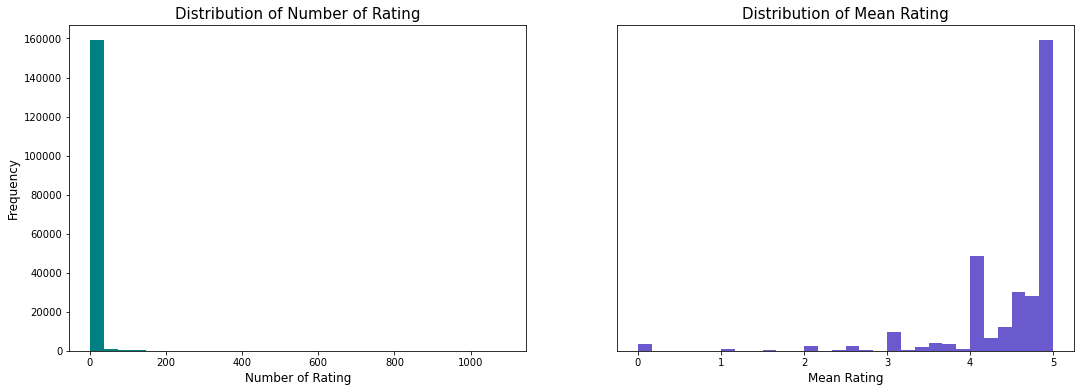

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

From these histograms we can see that most the number of ratings is between of ratings are between 0 and 1091, and most of the products have mean rating of 5. 

<Figure size 576x432 with 0 Axes>

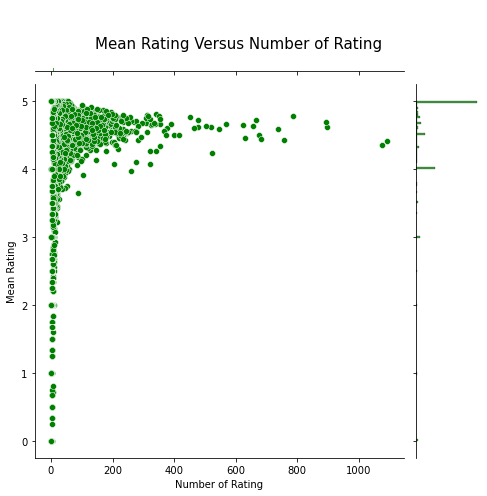

In [11]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_rating,color='g', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

I create a scatter plot to observe the relationship between Number of Rating and Mean Rating.

***Popularity-Based Recommender***

The implementation of Popularity-Based Filtering is straightforward. All we must do is sort our products based on ratings and display the top products of our list. Therefore, we should:

- Create a metric to score or rate the products.
- Calculate the score for every product.
- Sort the scores and recommend the best rated product to the users.

We can use the average ratings of the products as the score but using this will not be fair enough since a product with 5average rating and only43 votes cannot be considered better than the product with 4 as average rating but 40 votes. So, we use IMDB's weighted rating formula to score the products, as follows:

Weighted Rating (WR) = $(\frac{v}{v+m}.R)+(\frac{m}{v+m}.C)$

- v: the number of votes for the recipe
- m: the minimum votes required to be listed in the chart
- R: the average rating of the recipe
- C: the mean vote across the whole report


In this dataset, we have number of ratings 698901, and 25076 users, and 160901 recipes. (v=698901)

I made table to see the number of ratings per recipe and mean rating of that recipe. And we have (R) as Mean Rating.

In [12]:
df_rating['Mean Rating'].mean()

4.5033020347724735

After that I calculate the mean vote across Dataframe as C = 4.5033 on a scale of 5

In [13]:
df_rating['Number of Rating'].quantile(q=0.9)

8.0

The next step is to determine an appropriate value for m, the minimum number of votes required for a product to be listed in the chart. We use 90th percentile as our cutoff. In other words, for a product to feature in the charts, the number of its votes should be higher than that of 90% of the products in the list. (m=8)

In [14]:
df_filtered=df_rating[df_rating['Number of Rating']>df_rating['Number of Rating'].quantile(q=0.9)]

In [15]:
df_filtered.shape

(15051, 2)

Now, we filter the products that qualify for the chart and put them in a new dataframe called df_filtered. We see that there are 15051 products which qualify to be in this list.

In [16]:
def recipe_score(x):
    v=x['Number of Rating']
    m=df_rating['Number of Rating'].quantile(q=0.9)
    R=x['Mean Rating']
    C=df_rating['Mean Rating'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

Now, we calculate score for each qualified product. To do this, we define a function, recipe_score(), and apply this function to the DataFrame of qualified products.

In [17]:
df_filtered=df_filtered.assign(score=recipe_score(df_filtered))

In [18]:
df_filtered.head()

,Number of Rating,Mean Rating,score
recipe_id,,,
49,12,4.000000,4.201321
62,21,4.666667,4.621601
66,15,4.933333,4.783757
142,17,4.588235,4.561057
167,16,4.625000,4.584434


In [19]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)

In [20]:
df_highscore

,Number of Rating,Mean Rating,score
recipe_id,,,
186029,56,5.000000,4.937913
55309,48,5.000000,4.929043
25094,63,4.968254,4.915865
107059,39,5.000000,4.915456
107440,60,4.966667,4.912153
166669,35,5.000000,4.907591
153877,34,5.000000,4.905391
2677,32,5.000000,4.900660
24768,32,5.000000,4.900660


Finally, we sort the dataframe based on the score feature, and we print out top 10 popular products. 

In [21]:
df_highscore.index

Int64Index([186029, 55309, 25094, 107059, 107440, 166669, 153877, 2677, 24768,
            128566],
           dtype='int64', name='recipe_id')

So the top 10 popular products that this model will recommend to users include '186029', '55309', '25094', '107059', '107440','166669', '153877', '2677', '24768' and '128566'.

We should keep in mind that this popularity-based recommender provides a general table of recommended products to all the users, regardless of the user's personal taste. It is not sensitive to the interests and tastes of a particular user, and it does not give personalized recommendations based on the users.


***Collaborative recommender***

Our popularity-based recommender engine suffers from some severe limitations. It is not really personal and does not capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a recipe will receive the same recommendations for that product, regardless of who they are.

Therefore, in this section, I will use a technique called Collaborative Filtering to make better recommendations to Amazon customers.

Collaborative Filtering matches persons with similar interests and provides recommendations based on this matching. It is based on the idea that users similar to me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

Surprise library is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. Here we use the Surprise library that uses extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise Root Mean Square Error (RMSE) that is measured by Kfold Cross Validation and give great recommendations.


In [22]:
svd = SVD()

In [23]:
reader = Reader()

In [24]:
data = Dataset.load_from_df(df[['user_id', 'recipe_id', 'rating']], reader)

We use SVD algorithm and load the dataset.

In [25]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9203  0.9263  0.9208  0.9102  0.9230  0.9201  0.0054  
MAE (testset)     0.5450  0.5453  0.5439  0.5388  0.5451  0.5436  0.0025  
Fit time          34.13   33.26   38.95   37.78   34.51   35.73   2.22    
Test time         1.24    1.09    1.73    1.34    1.36    1.35    0.21    


{'test_rmse': array([0.92027646, 0.92629801, 0.92080848, 0.91021106, 0.92300828]),
 'test_mae': array([0.54496065, 0.54531713, 0.54389521, 0.53880631, 0.54511945]),
 'fit_time': (34.13126611709595,
  33.26253867149353,
  38.952271938323975,
  37.777955293655396,
  34.509873151779175),
 'test_time': (1.2431633472442627,
  1.0911896228790283,
  1.7330577373504639,
  1.3417630195617676,
  1.3561387062072754)}

Then we run 5-fold cross-validation and print the results. We get Root Mean Square Error of 0.9206 which is good. Now I will train on the dataset and do predictions.

In [26]:
trainset = data.build_full_trainset()

In [27]:
svd.fit(trainset)

We train the algorithm on the trainset

In [28]:
df[df['user_id'] == 1773]

,user_id,recipe_id,rating
2,1773,7435,5.0
3,1773,278,4.0


In [29]:
svd.predict(uid=1773, iid=280, r_ui=None).est

4.734324395704872

Let us pick the user with user_id of '1773' and check the ratings she/he has given so far to different products. As we can see the user ‘1773’ has given 2 rating so we want to check the different recipe to predict how should he/she would rate that specific product. I will choose specific recipe_id = 280. Our model predicts that userId of '1773' will give 4.38 as the rating for productId of '280'.

***Hybrid Recommender***

In this section, we try to build a hybrid recommender that combines corrwith() method which computes the Pearson correlation coefficients with collaborative filtering. This is how it works:

- Input: User ID and Product ID
- Output: Similar products sorted based on expected ratings by a particular user.


In [30]:
df_users=df.groupby('user_id').filter(lambda x: x['rating'].count()>=50)
df_users= df_users.sample(frac=0.1)

In [31]:
df_users.head()

,user_id,recipe_id,rating
77170,28346,69564,4.0
129369,130663,127204,5.0
569593,539686,406625,5.0
326701,168462,151788,5.0
167047,239618,103572,4.0


To avoid processing difficulties, we filter data which only contains the customers who have given ratings more than 50 times and put them into a dataframe. Since we are providing the recommendation of the recipe to the customers, it is better to remove data based on the userId rather than recipe_id. 

In [32]:
df_users.shape

(48780, 3)

The dataframe now only contain 48780 rows.


In [33]:
matrix=pd.pivot_table(data=df_users, 
                      values='rating', 
                      index='user_id',
                      columns='recipe_id',
                      fill_value=0)

Then we create a pivot table.

In [34]:
matrix.head()

recipe_id,40,52,58,62,85,113,123,167,170,181,...,527823,530551,531108,531143,532429,532736,532740,536119,536212,536411
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
a=matrix

In [36]:
def hybrid_recommendations(user_id, recipe_id):
    top_five=a.corrwith(a[recipe_id]).sort_values(ascending=False).head()
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='nan':
            est_rating.append(svd.predict(user_id, iid=x, r_ui=None).est)
           
    return pd.DataFrame({'recipe_id':list(top_five.index)[:len(est_rating)], 
                         'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)

Finally, we define a function that takes in recipe_id and use_id as input and outputs up to 5 most similar recipes. For this purpose, I use corrwith() method to compute pairwise correlation between columns of dataFrame and calculate Pearson correlation coefficients.

In [60]:
hybrid_recommendations(2310, 531108)

,recipe_id,estimated_rating
0,220633,4.811245
1,144179,4.774112
2,47432,4.661700
3,143774,4.622435
4,480958,4.457862


As an example, we use this hybrid function to recommend similar recipes and predict the scores that might be given by a specific user to these similar recipes. It should be noted that this function was defined based on df_users dataframe that only includes the users who have rated 50 times or more. Now, we check the performance of this hybrid recommender for some of the user_id included in df_users dataframe.

## **Conclusion**

I built three different recommendation systems based on different algorithms. They are as follows:

- Popularity-Based Recommender: This system used the overall Number of Rating and VMean Rating to find the top 10 recipes. The IMDB Weighted Rating System was used to calculate scores on which the sorting was finally performed.


- Collaborative Filtering: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was about 0.9026 and the engine predicted estimated ratings for a given user and recipes.


- Hybrid Engine: We combined corrwith() method which computed the Pearson correlation coefficients with collaborative filtering. Our hybrid recommender took use_id and recipe_id as input and suggested up to 5 products that were like the input recipe_id based on the estimated ratings that was internally calculated for the input user_id. This Hybrid System took advantage of both Pearson method and Collaborative filtering and therefore made reliable predictions.
